In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [9]:
df = pd.read_csv("..\dataset\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
df.shape

(918, 12)

In [11]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [14]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [15]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [16]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("we have {} numerical features : {} ".format(len(numeric_features), numeric_features))
print("we habe {} categorial features : {} ". format(len(categorical_features),categorical_features))

we have 7 numerical features : ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease'] 
we habe 5 categorial features : ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] 


In [18]:
print(f"categories in Sex : {df['Sex'].unique()} ")
print(f"categories in ChestPainType : {df['ChestPainType'].unique()}")
print(f"categories in RestingECG : {df['RestingECG'].unique()}")
print(f"categories in ExerciseAngina : {df['ExerciseAngina'].unique()} ")
print(f"categories in ST_Slope : {df['ST_Slope'].unique()}")

categories in Sex : ['M' 'F'] 
categories in ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
categories in RestingECG : ['Normal' 'ST' 'LVH']
categories in ExerciseAngina : ['N' 'Y'] 
categories in ST_Slope : ['Up' 'Flat' 'Down']


In [19]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

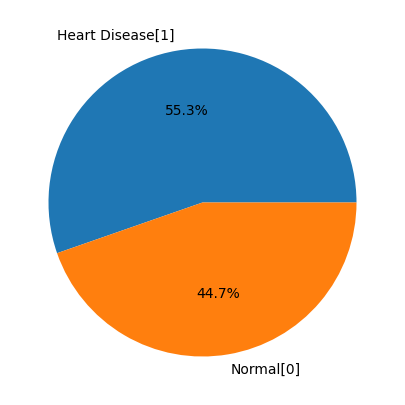

In [20]:
plt.figure(figsize=(10,5))
plt.pie(df['HeartDisease'].value_counts(),labels=['Heart Disease[1]','Normal[0]'], autopct='%1.1f%%')
plt.show()

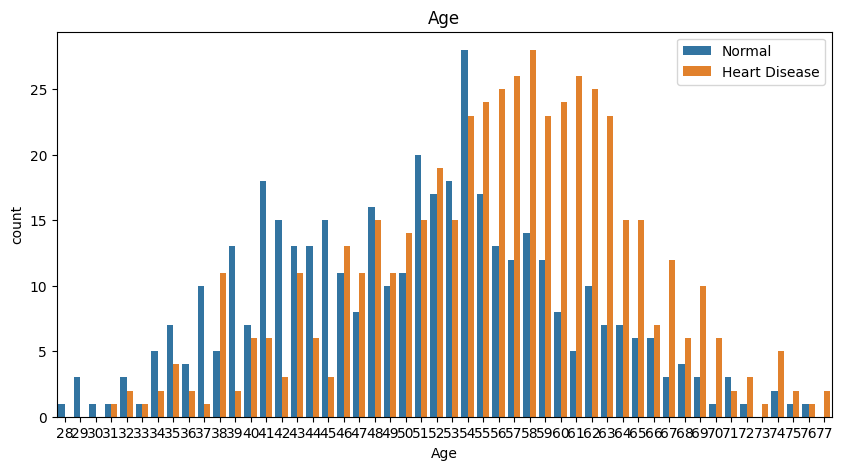

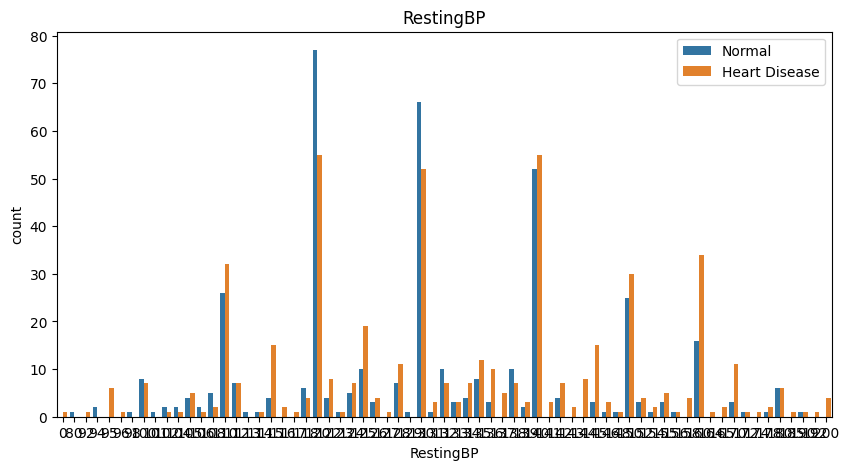

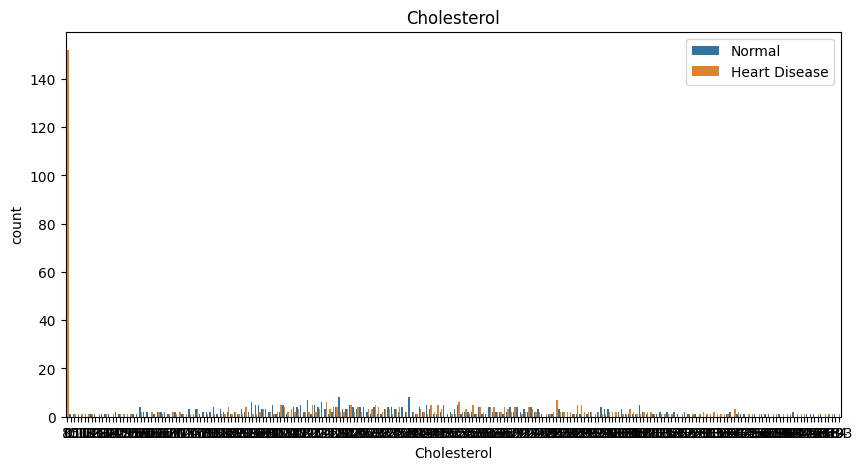

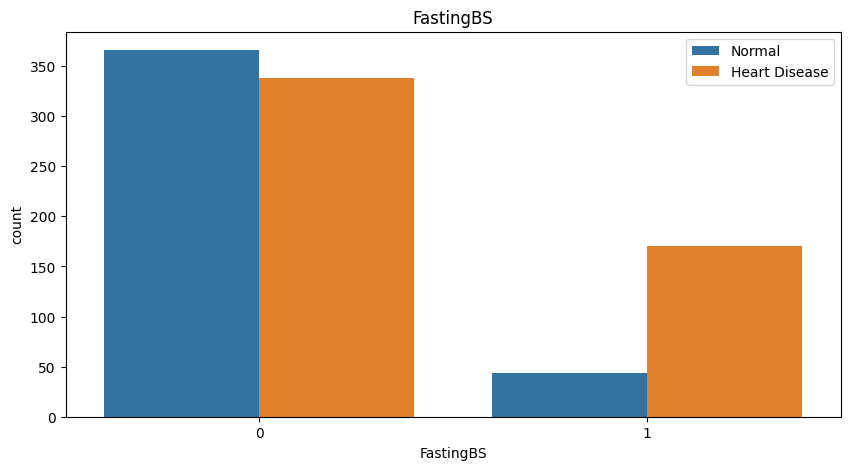

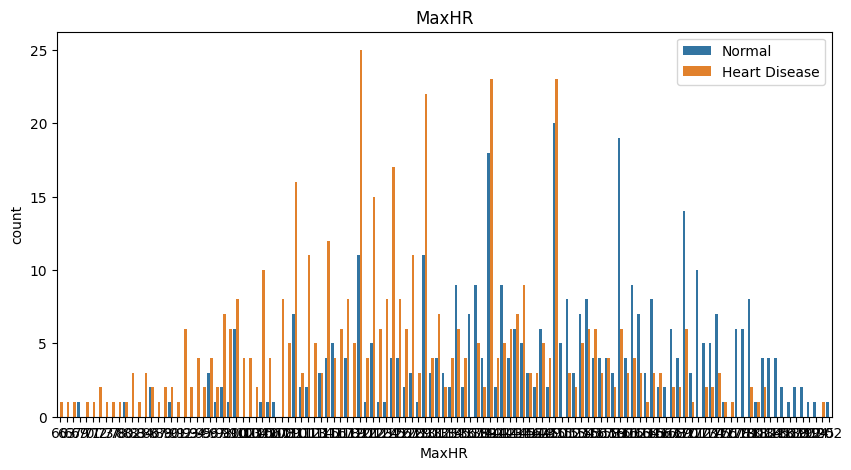

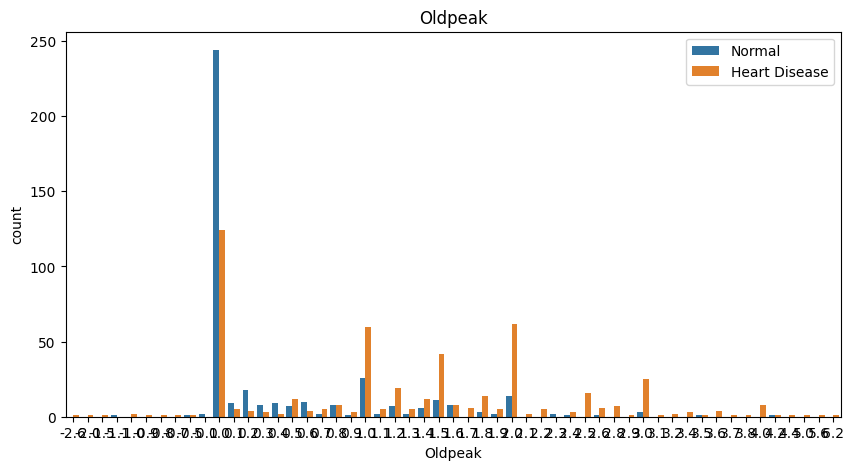

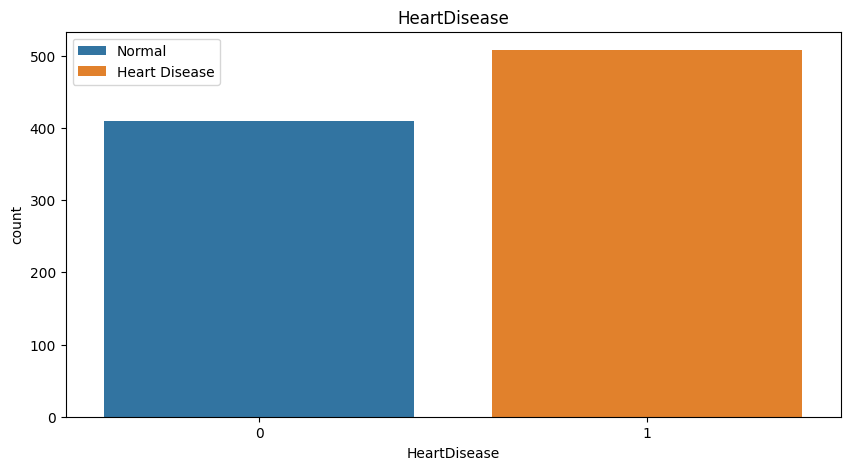

In [21]:
for numeric_feat in numeric_features:
    plt.figure(figsize=(10,5))
    sns.countplot(x=numeric_feat, data=df,hue="HeartDisease")
    plt.legend(['Normal','Heart Disease'])
    plt.title(numeric_feat)
    plt.show()

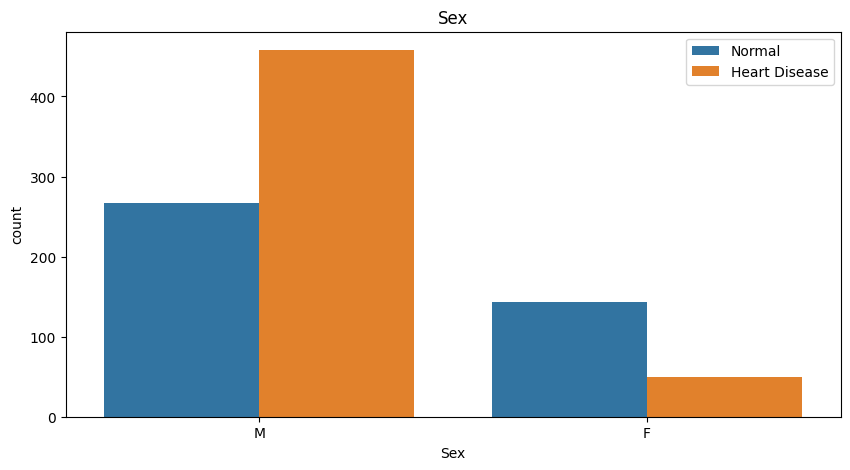

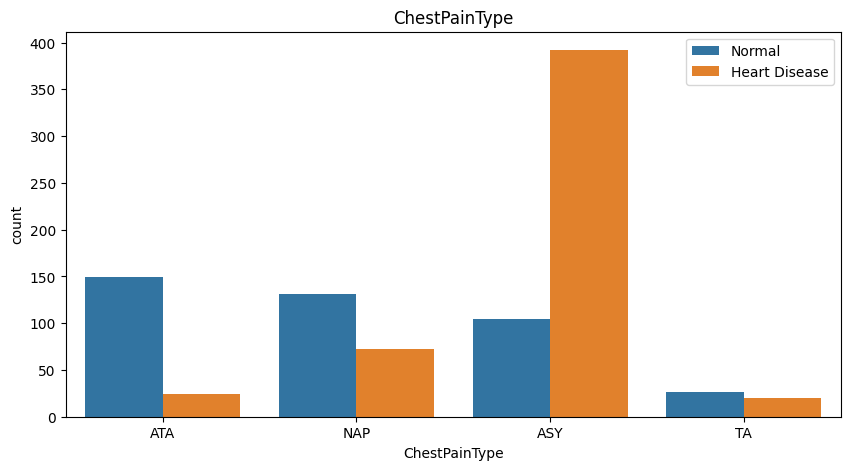

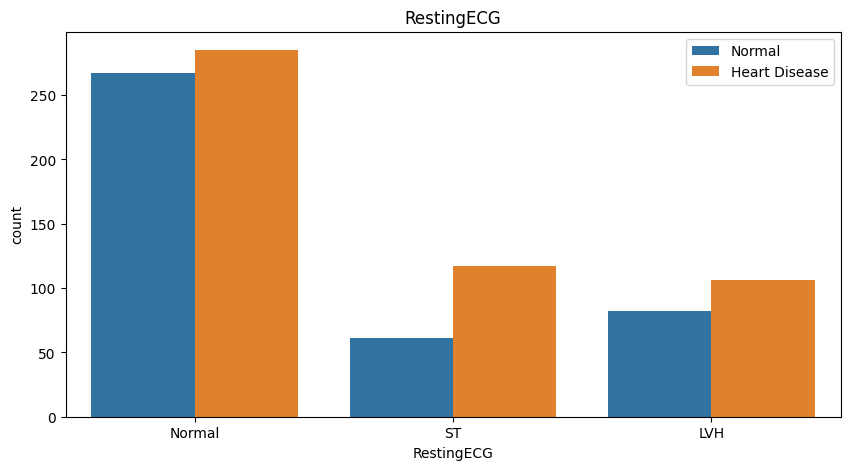

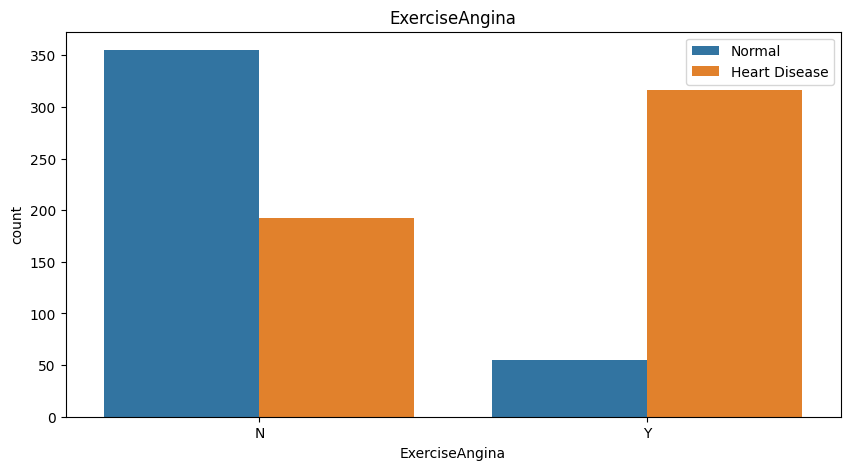

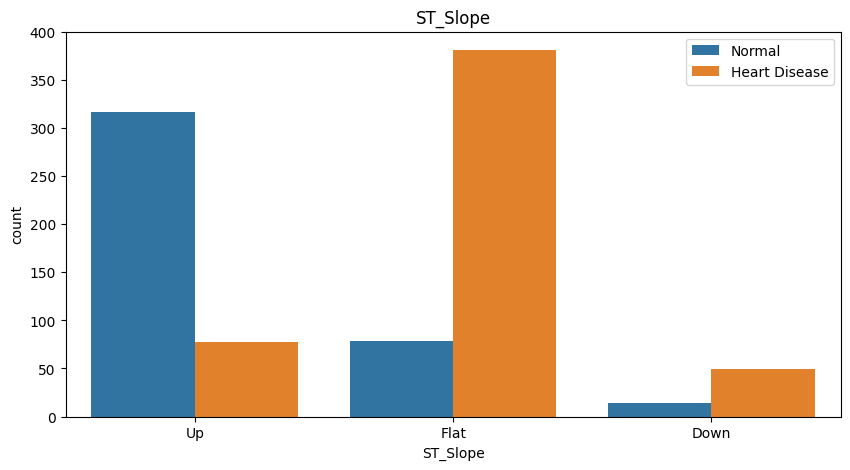

In [22]:
for cat_feat in categorical_features:
    plt.figure(figsize=(10,5))
    sns.countplot(x=cat_feat,data=df,hue='HeartDisease')
    plt.legend(['Normal','Heart Disease'])
    plt.title(cat_feat)
    plt.show()

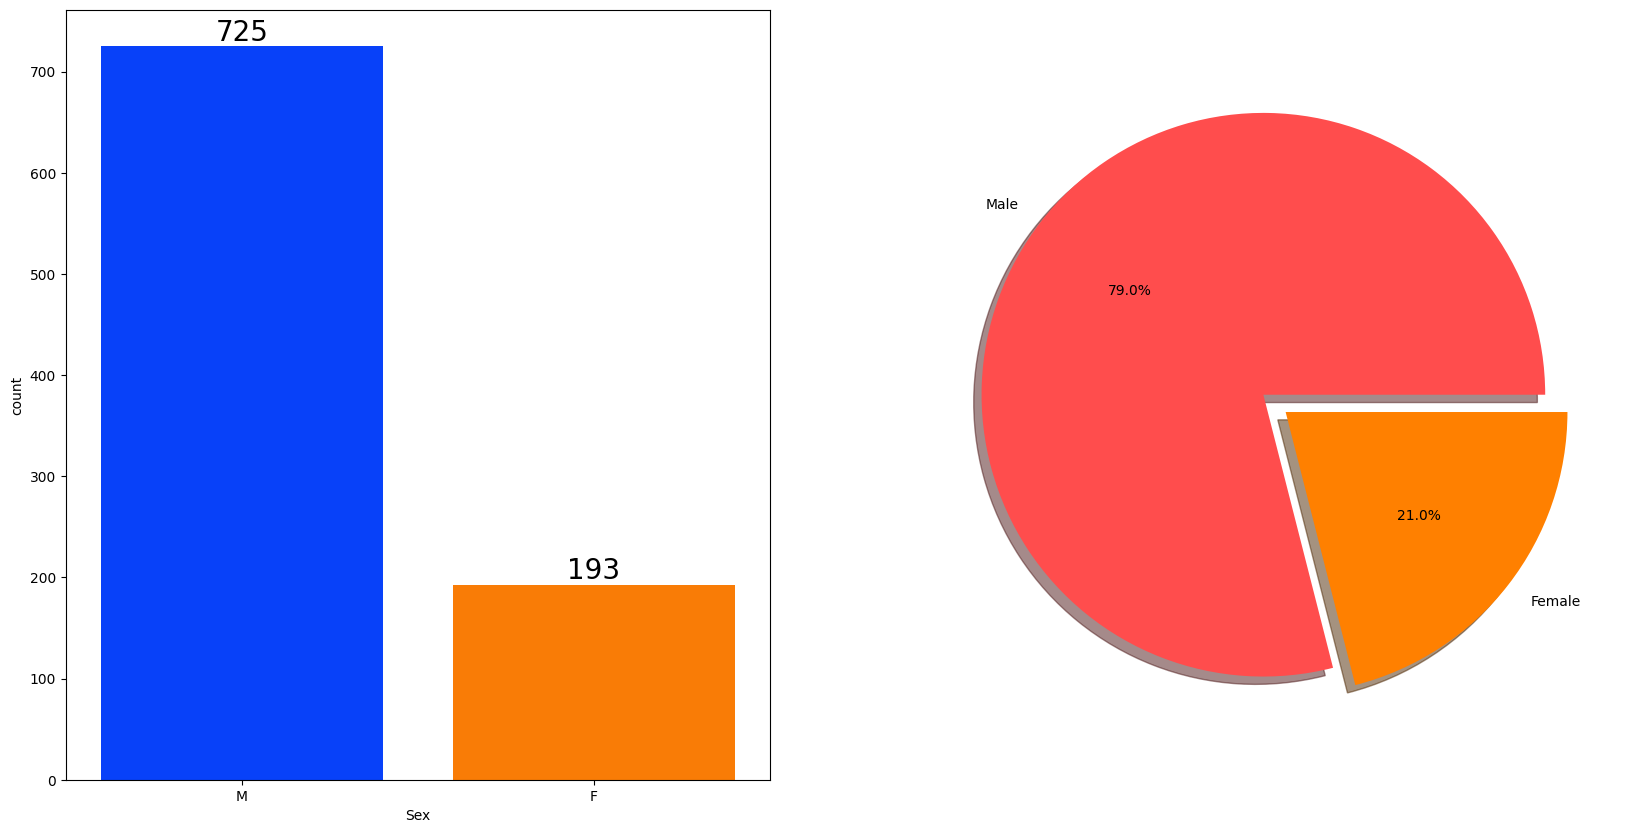

In [23]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Sex'], data=df, palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Sex'].value_counts(),labels=['Male','Female'], explode=[0,0.1],autopct='%1.1F%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [27]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

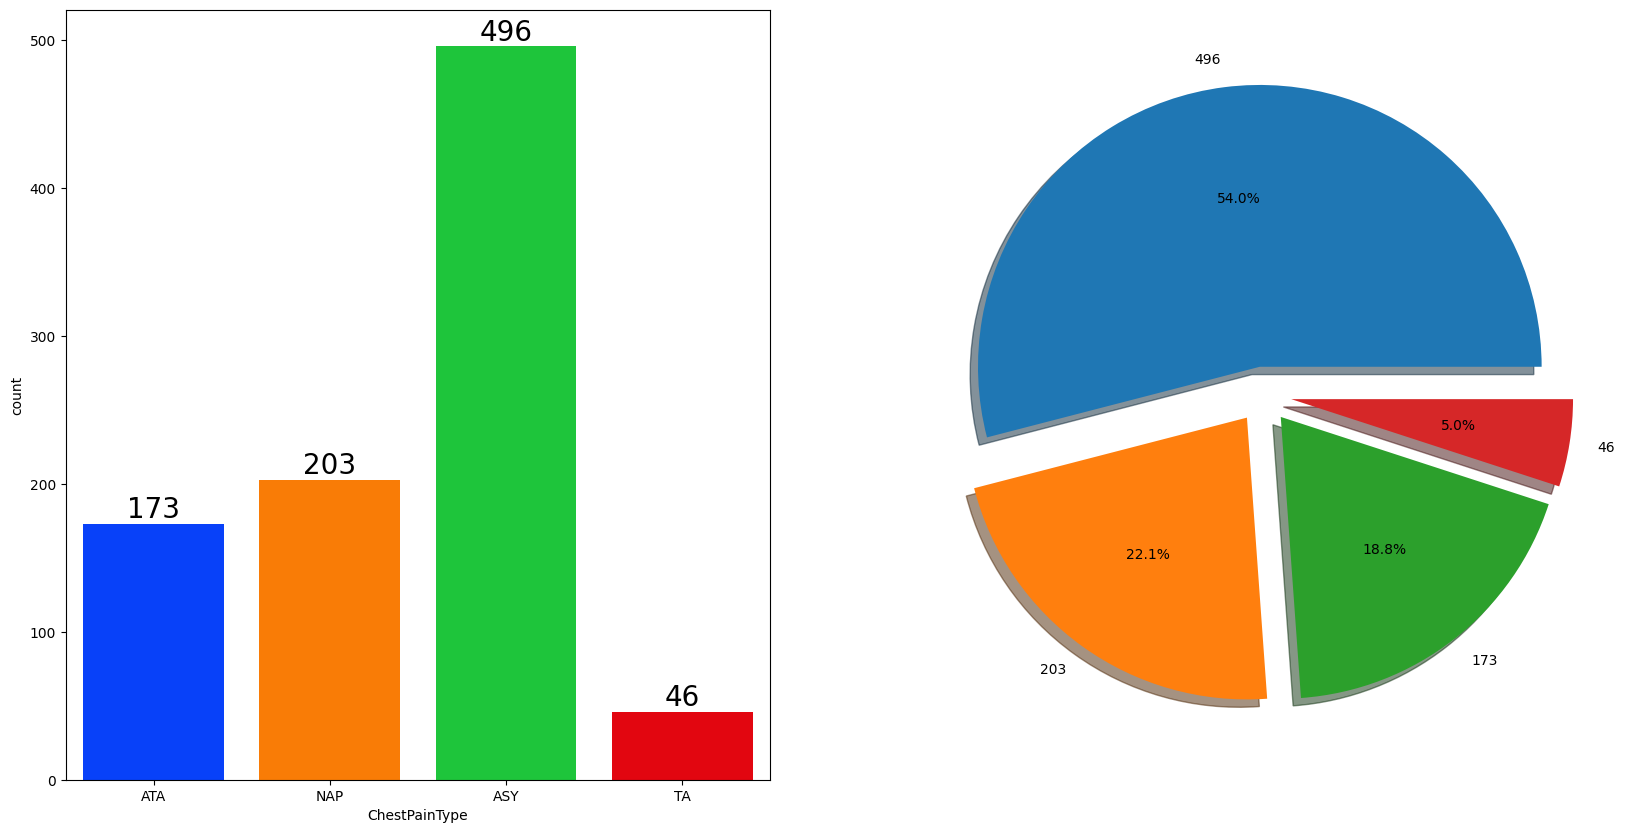

In [30]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['ChestPainType'], data=df, palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['ChestPainType'].value_counts(),labels=df['ChestPainType'].value_counts(), explode=[0.1,0.1,0.1,0.1],autopct='%1.1F%%',shadow=True)
plt.show()

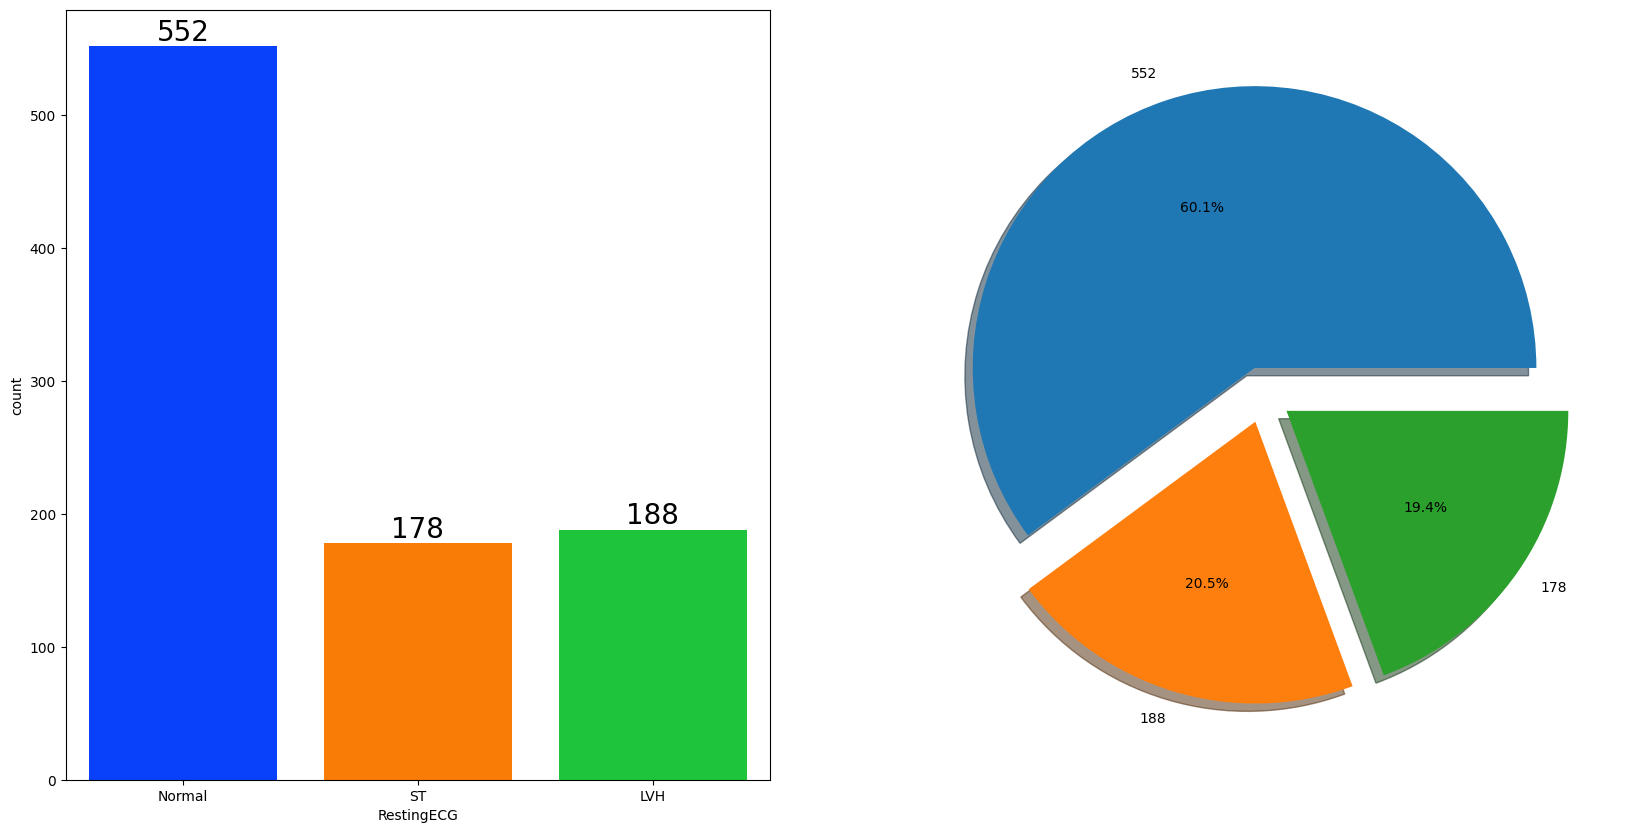

In [32]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['RestingECG'], data=df, palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['RestingECG'].value_counts(),labels=df['RestingECG'].value_counts(), explode=[0.1,0.1,0.1],autopct='%1.1F%%',shadow=True)
plt.show()

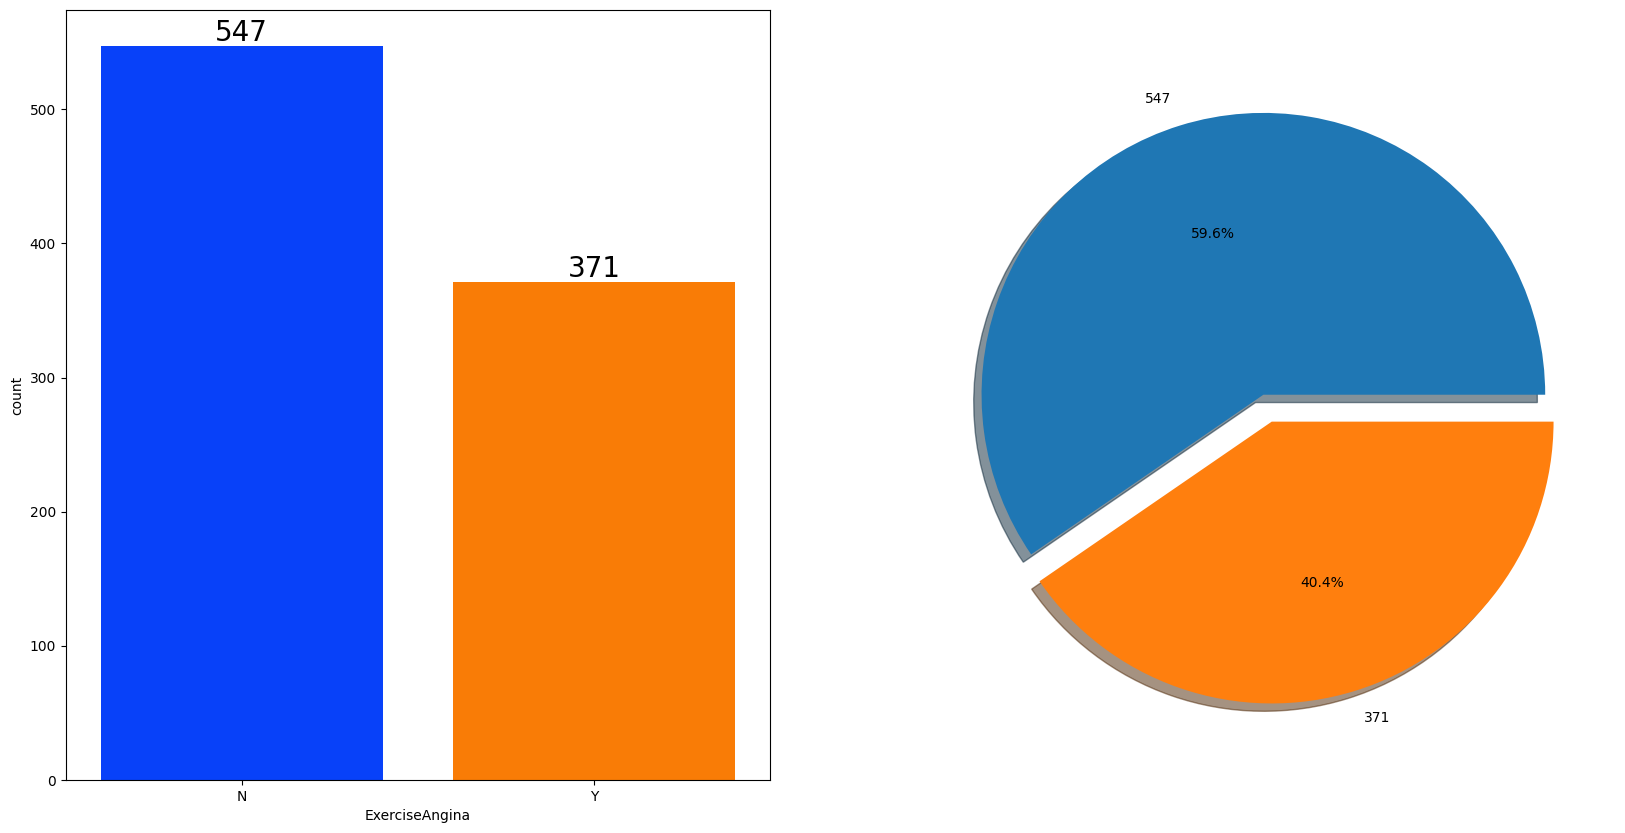

In [33]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['ExerciseAngina'], data=df, palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['ExerciseAngina'].value_counts(),labels=df['ExerciseAngina'].value_counts(), explode=[0,0.1],autopct='%1.1F%%',shadow=True)
plt.show()

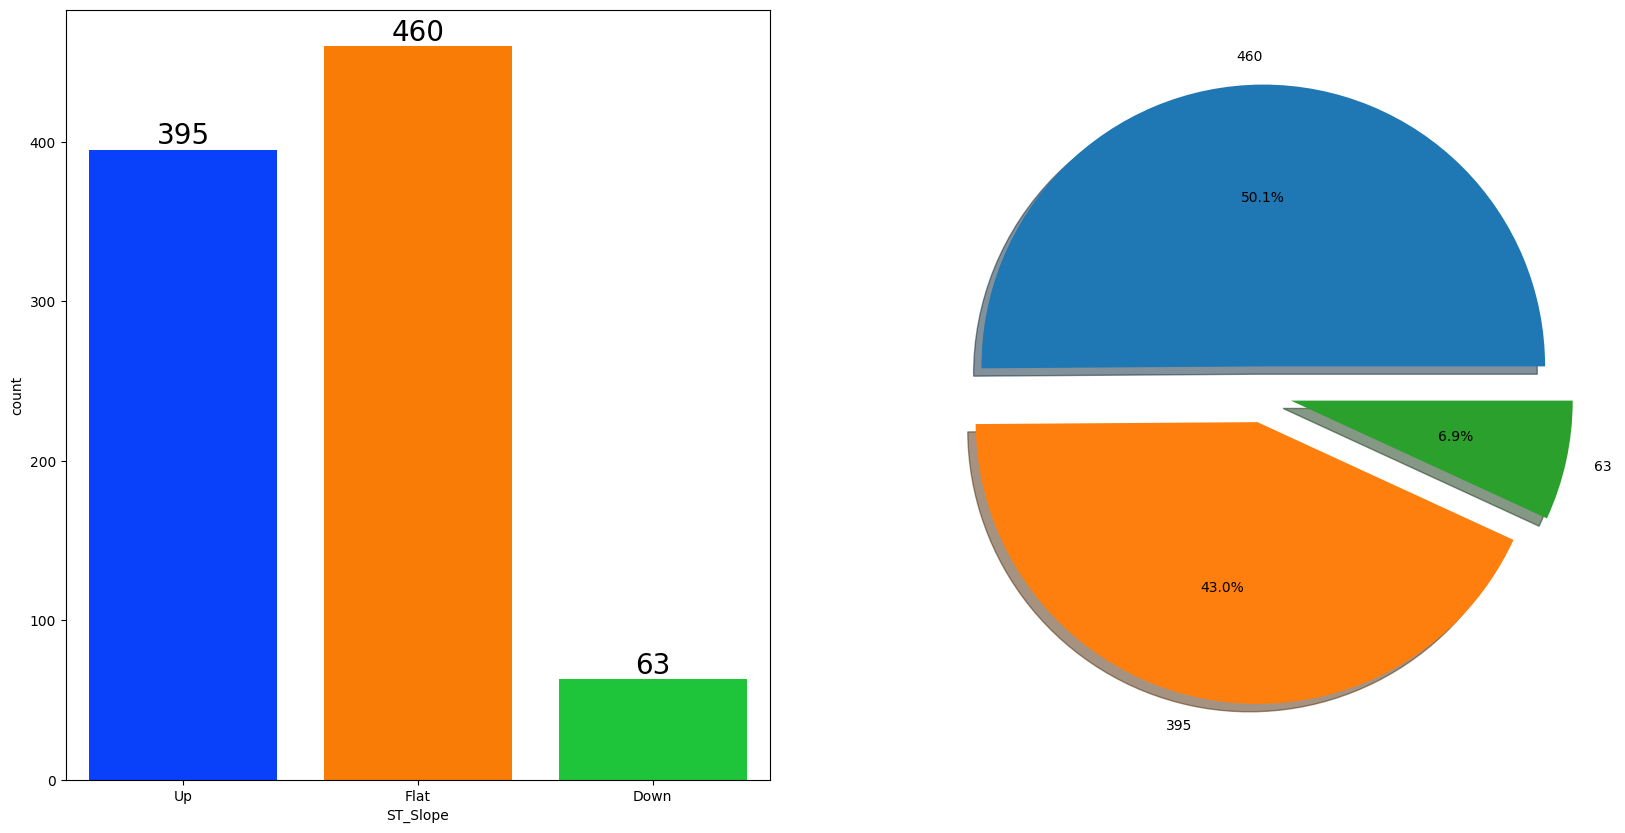

In [34]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['ST_Slope'], data=df, palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['ST_Slope'].value_counts(),labels=df['ST_Slope'].value_counts(), explode=[0.1,0.1,0.1],autopct='%1.1F%%',shadow=True)
plt.show()

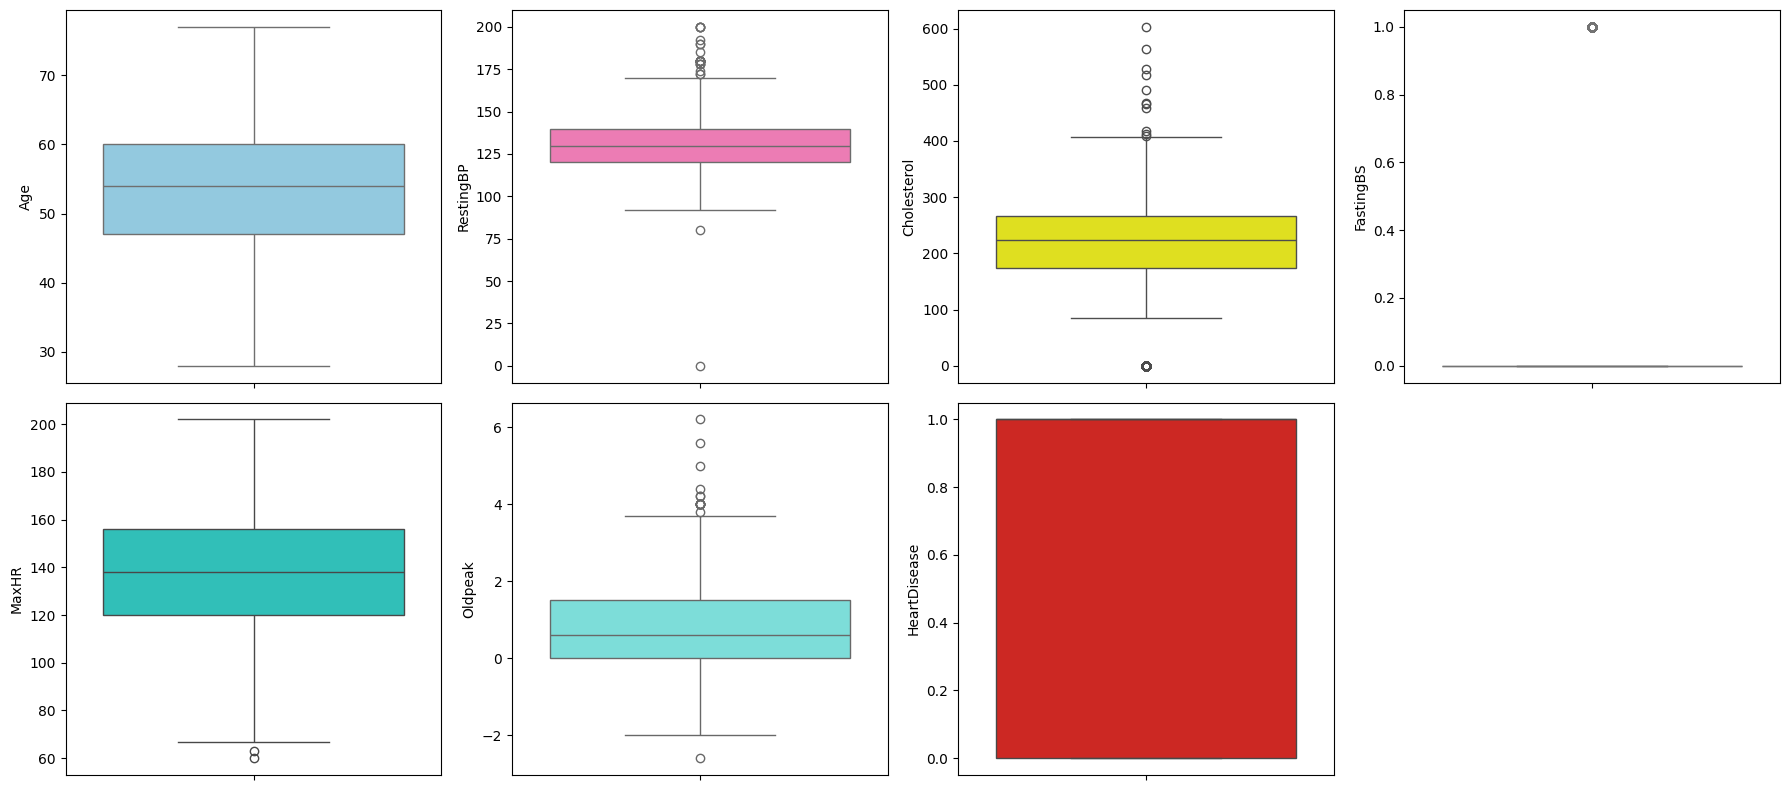

In [42]:
plt.figure(figsize=(18,8))

plt.subplot(241); sns.boxplot(y=df['Age'],         color='skyblue')
plt.subplot(242); sns.boxplot(y=df['RestingBP'],   color='hotpink')
plt.subplot(243); sns.boxplot(y=df['Cholesterol'], color='yellow')
plt.subplot(244); sns.boxplot(y=df['FastingBS'],   color='lightgreen')
plt.subplot(245); sns.boxplot(y=df['MaxHR'],       color='#1AD6CD')
plt.subplot(246); sns.boxplot(y=df['Oldpeak'],     color='#6DEDE7')
plt.subplot(247); sns.boxplot(y=df['HeartDisease'],color='#E80E07')

plt.tight_layout()
plt.show()
